In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import img_to_array
from imutils import paths


imagePaths_train = sorted(list(paths.list_images(".\\Dataset\\OK\\train")))
imagePaths_test = sorted(list(paths.list_images(".\\Dataset\\OK\\test")))

train_feature = []
train_label = [0, 0, 0, 0, 1, 1, 1, 1]
test_feature = []
test_label = [0, 0, 0, 0, 1, 1, 1, 1]

for imagePath in imagePaths_train:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    train_feature.append(image)
for imagePath in imagePaths_test:
    #print(imagePath)
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath, 0)
    image = img_to_array(image)
    test_feature.append(image)

In [12]:
train_feature = np.array(train_feature, dtype="float")
test_feature = np.array(test_feature, dtype="float")
train_label = np.array(train_label)
test_label = np.array(test_label)

print("Train Data shape:" + str(train_feature.shape))
print("Test Data shape:" + str(test_feature.shape))

Train Data shape:(8, 128, 128, 1)
Test Data shape:(8, 128, 128, 1)


In [13]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='gray')
    plt.show() 

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='gray')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

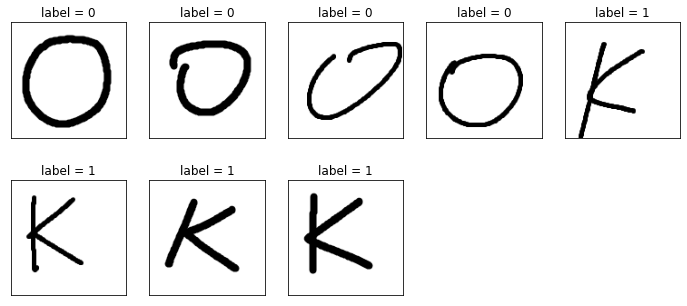

In [14]:
show_images_labels_predictions(train_feature,train_label,[],0,8)

## 可更改參數：
### 1.可增加或減少網路架構
### 2.kernel_size：可改為 (3,3) (5,5)
### 3.padding：’valid’為不填充；’same’為填充
### 4.pool_size：可改為 (2,2) (3,3)
### 5.MaxPool2D為最大池化；AvgPool2D為均值池化

In [21]:
#自訂網路架構
model = Sequential()

model.add(Conv2D(filters=4, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(128, 128, 1))) #彩色時(高,寬,cheanl)
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

In [22]:
model.summary()

# 卷積層 Param =（卷積核長度 *卷積核寬度 *通道數 +1）*卷積核個數
# 全連接層 Param = （輸入數據維度+1）* 神經元個數
# 加1是考慮到每個神經元都有一個 Bias

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 4)       104       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 4)         148       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 4)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 4)       

## 可更改參數：
### 1.所想看到的網路層
### 2.函數中的層數要一同更改

In [23]:
#將所想看到的feature map儲存到 model_layers
model_layers = [Model(inputs=model.layers[0].input, outputs=model.layers[0].output),
                Model(inputs=model.layers[0].input, outputs=model.layers[1].output),
                Model(inputs=model.layers[0].input, outputs=model.layers[3].output),
                Model(inputs=model.layers[0].input, outputs=model.layers[5].output),
               ]
print(model.layers[0].input)
print(model.layers[1].output)
print(model.layers[3].output)
print(model.layers[5].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 4), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 4), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 4), dtype=tf.float32, name=None), name='max_pooling2d_6/MaxPool:0', description="created by layer 'max_pooling2d_6'")


In [25]:
#可看到 model_layers的feature map

%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib import patches

def interact_result(data):
    preds = []
    for model_layer in model_layers:
        preds.append(model_layer.predict(data))
    
    def view_image(i):
        # 層數要改
        fig, axes = plt.subplots(4, 4, figsize = (25, 25)) 
        fig.subplots_adjust(hspace=0.01, wspace=0.4)
        for l, pred in enumerate(preds):  
            print(pred.shape)
            for n in range(pred[i].shape[2]):
                axes[l,n].imshow(pred[i][:,:,n] * 255)
        
    interact(view_image, i=(0, data.shape[0]-1))

In [26]:
interact_result(train_feature)

1/1 [==============================] - 0s 95ms/step


interactive(children=(IntSlider(value=3, description='i', max=7), Output()), _dom_classes=('widget-interact',)…

In [27]:
interact_result(test_feature)

1/1 [==============================] - 0s 36ms/step


interactive(children=(IntSlider(value=3, description='i', max=7), Output()), _dom_classes=('widget-interact',)…